### Load python libraries

In [3]:
import pandas as pd
import numpy as np
from ase.io.trajectory import Trajectory
from ase.visualize import view
import matplotlib.pyplot as plt
from pylab import *
from ase import io
from scipy import integrate
from scipy import interpolate
import waterfall_chart
import random
from scipy.stats import norm
import pickle
from ase.db import connect
#import shap

### Plot d-PDOS of Pt1Ag SAAs with various facets

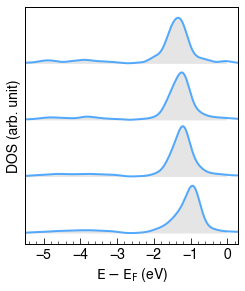

In [4]:
energ = np.linspace(-15,15,3001)
dos_111 = np.loadtxt('Data/dos_111.txt')
dos_100 = np.loadtxt('Data/dos_100.txt')
dos_211 = np.loadtxt('Data/dos_211.txt')
dos_210 = np.loadtxt('Data/dos_210.txt')

symbols = ['s','o','^','v','<','>','+','x','D','d'] # Symbol
lps = [k+'-' for k in ['o','^','v','<','>','s','+','x','D','d']] # Line + Symbol
colors= ['b','r','g','c','m','y','k','w'] # Color
ms = 4
ew = 1.5
rcParams['figure.figsize'] = 3.5*1.5*1.67323/2.3,4.0*1.5*1.67323/2.3
rcParams['ps.useafm'] = True
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rcParams['axes.linewidth'] = 1

rcParams['pdf.fonttype'] = 42
matplotlib.rc('xtick.major', size=6)
matplotlib.rc('xtick.minor', size=3)
matplotlib.rc('ytick.major', size=6)
matplotlib.rc('ytick.minor', size=3)
matplotlib.rc('lines', markeredgewidth=0.5*2)
matplotlib.rc('font', size=7*2.0)

fig, ax1 = plt.subplots()

dd = 1.2

plt.plot(energ,dos_111+3*dd,color='dodgerblue', linewidth = 2,label = '111',alpha=0.75)
plt.plot(energ,dos_100+2*dd,color='dodgerblue', linewidth = 2,label = '100',alpha=0.75)
plt.plot(energ,dos_211+dd,color='dodgerblue', linewidth = 2,label = '211',alpha=0.75)
plt.plot(energ,dos_210,color='dodgerblue', linewidth = 2,label = '210',alpha=0.75)


plt.xlabel(r'$\rm E - E_F$ (eV)')
plt.ylabel('DOS (arb. unit)')
plt.minorticks_on()
#plt.tick_params(axis="y",direction="in",which='both')
plt.tick_params(axis="x",direction="in",which='both')
#plt.legend(ncol=1,loc = 'upper left',frameon=False,prop={'size': 11})
plt.xlim([-5.5,0.3])
#plt.ylim([0,1.9])
plt.xticks([-5,-4,-3,-2,-1,0])
plt.yticks([])

plt.fill_between(energ,0,dos_210,where = energ<0,color='gray',alpha=0.2,linewidth=0.0)
plt.fill_between(energ,dd,dos_211+dd,where = energ<0,color='gray',alpha=0.2,linewidth=0.0)
plt.fill_between(energ,2*dd,dos_100+2*dd,where = energ<0,color='gray',alpha=0.2,linewidth=0.0)
plt.fill_between(energ,3*dd,dos_111+3*dd,where = energ<0,color='gray',alpha=0.2,linewidth=0.0)

#plt.savefig('Pt1Ag_CN.png', format='png',transparent = True,dpi=600,bbox_inches='tight')

### Calculate d-moments from d-PDOS

In [ ]:
def get_center(dos_d, ergy):
    upp = np.max((np.argsort(np.abs(integrate.cumtrapz(dos_d,ergy)-0.95))[0],2001))
    nstates = integrate.cumtrapz(dos_d[:upp], ergy[:upp])[-1]
    d_cen = integrate.cumtrapz(ergy[:upp] * dos_d[:upp], ergy[:upp])[-1] / nstates
    return d_cen
def get_moment(dos_d, ergy, n):
    upp = np.max((np.argsort(np.abs(integrate.cumtrapz(dos_d,ergy)-0.95))[0],2001))
    nstates = integrate.cumtrapz(dos_d[:upp], ergy[:upp])[-1]
    d_cen = integrate.cumtrapz(ergy[:upp] * dos_d[:upp], ergy[:upp])[-1] / nstates
    mn = integrate.cumtrapz((ergy[:upp]-d_cen)**n * dos_d[:upp], ergy[:upp])[-1] / nstates
    return mn

### Plot d-PDOS of dimer SAA Pt1M1Ag with various dopant metal M

In [ ]:
symbols = ['s','o','^','v','<','>','+','x','D','d'] # Symbol
lps = [k+'-' for k in ['o','^','v','<','>','s','+','x','D','d']] # Line + Symbol
colors= ['b','r','g','c','m','y','k','w'] # Color
ms = 4
ew = 1.5
rcParams['figure.figsize'] = 3.5*1.5*1.67323/2.3,4.0*1.5*1.67323/2.3
rcParams['ps.useafm'] = True
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rcParams['axes.linewidth'] = 1

rcParams['pdf.fonttype'] = 42
matplotlib.rc('xtick.major', size=6)
matplotlib.rc('xtick.minor', size=3)
matplotlib.rc('ytick.major', size=6)
matplotlib.rc('ytick.minor', size=3)
matplotlib.rc('lines', markeredgewidth=0.5*2)
matplotlib.rc('font', size=9*2.0)

fig, ax = plt.subplots()

#For example, we plot DOS of Pt1Os1Ag:
X = np.loadtxt('Data/dos_Os.txt')
y = energ

plt.plot(X+0.1,y,color='lightcoral',linewidth=3)
#plt.ylim([-2.8,0.3])
plt.ylim([-7,1.5])
plt.xlim([0,1.25])
plt.xticks([])
plt.yticks([])
#plt.yticks([-2.5,-2,-1.5,-1,-0.5,0])
plt.yticks([-6,-4.5,-3,-1.5,0,1.5])

plt.fill_between(X+0.1,y,0,where = y<0,color='gray',alpha=0.2,linewidth=0.0)


ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

#plt.savefig('axis.png', format='png',transparent = True,dpi=300,bbox_inches='tight')